In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots

In [2]:
dbFile = 'feature_baseline_10yrs.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.Database(dbFile, defaultTable='observations')
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []

metric = metrics.MeanMetric(col='slewtime')
slicer = slicers.HealpixSlicer(nside=64, latCol='alt', lonCol='az', latLonDeg=True, useCache=False)

plotFunc = plots.LambertSkyMap()

# toss things where there was no slew or a filterchange
sql = 'slewtime>0 and slewtime<120.'

bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotFuncs=[plotFunc]))

# Let's count the long slews
metric = metrics.CountMetric(col='slewtime')
slicer = slicers.HealpixSlicer(nside=64, latCol='alt', lonCol='az', latLonDeg=True, useCache=False)
plotFunc = plots.LambertSkyMap()
sql = 'slewtime>40. and slewtime<120.'
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotFuncs=[plotFunc]))


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [4]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Querying database observations with constraint slewtime>40. and slewtime<120. for columns ['slewtime', 'az', 'alt']
Found 49895 visits
Running:  ['opsim_Count_slewtime_slewtimegt40_and_slewtimelt120_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint slewtime>0 and slewtime<120. for columns ['slewtime', 'az', 'alt']
Found 2284633 visits
Running:  ['opsim_Mean_slewtime_slewtimegt0_and_slewtimelt120_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "slewtime>40. and slewtime<120." constraint now.


/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Plotting complete.
Plotting figures with "slewtime>0 and slewtime<120." constraint now.
Plotting complete.


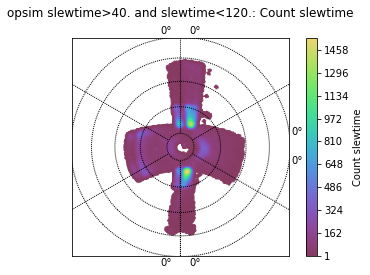

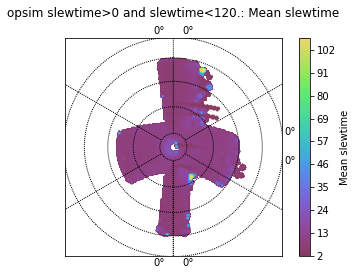

In [5]:
bg.plotAll(closefigs=False)

In [6]:
dbFile = 'astro-lsst-01_2013.db'
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [7]:
bundleList = []

metric = metrics.MeanMetric(col='slewTime')
slicer = slicers.HealpixSlicer(nside=64, latCol='altitude', lonCol='azimuth', latLonDeg=True, useCache=False)

plotFunc = plots.LambertSkyMap()

# toss things where there was no slew or a filterchange
sql = 'slewTime>0 and slewTime<120.'
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotFuncs=[plotFunc]))

# Let's count the long slews
metric = metrics.CountMetric(col='slewTime')
slicer = slicers.HealpixSlicer(nside=64, latCol='altitude', lonCol='azimuth', latLonDeg=True, useCache=False)
plotFunc = plots.LambertSkyMap()
sql = 'slewTime>40. and slewTime<120.'
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotFuncs=[plotFunc]))


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database SummaryAllProps with constraint slewTime>0 and slewTime<120. for columns ['slewTime', 'azimuth', 'altitude']
Found 2351249 visits
Running:  ['opsim_Mean_slewTime_slewTimegt0_and_slewTimelt120_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint slewTime>40. and slewTime<120. for columns ['slewTime', 'azimuth', 'altitude']
Found 43329 visits
Running:  ['opsim_Count_slewTime_slewTimegt40_and_slewTimelt120_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "slewTime>0 and slewTime<120." constraint now.


/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Plotting complete.
Plotting figures with "slewTime>40. and slewTime<120." constraint now.
Plotting complete.


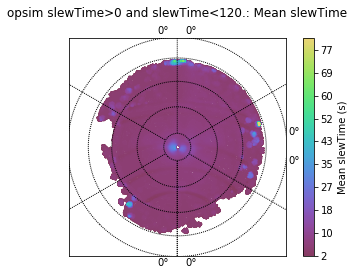

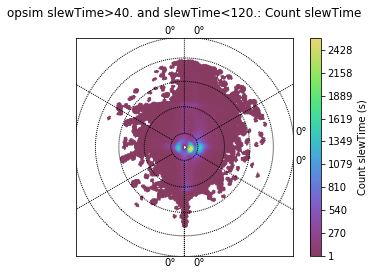

In [8]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)